## Exploratory Data Analysis

Use this notebook to get familiar with the datasets we have. There is 10 questions we need to answer during the EDA.


We shouldn't limit our EDA to these 10 questions. Let's be creative :).

In [28]:
# import libraries
import numpy as np
from numpy import *
import pandas as pd
from datetime import datetime, timezone, timedelta
import datetime as dt
import time
from collections import Counter
from PIL import Image

from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import anderson
from scipy.stats import ttest_rel
from scipy.stats import ttest_ind
from scipy.stats import ks_2samp
from scipy.stats import kruskal
from scipy.stats import f_oneway

from statsmodels.graphics.gofplots import qqplot

# import matplotlib
from matplotlib import pyplot
import matplotlib.pyplot as plt

# import seaborn
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# import category encoders
import category_encoders as ce

#for showing 2D plot
%matplotlib inline 

# to be able to see multiple ouputs from sungle cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
# datasets import
train_df = pd.read_csv('train_df.csv')

# 'fl_date' should be converted to datetime ('2019-05-01')
train_df['fl_date'] = pd.to_datetime(train_df['fl_date'], format='%Y-%m-%d')

train_df.info()
train_df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1562048 entries, 0 to 1562047
Data columns (total 22 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   fl_date             1562048 non-null  datetime64[ns]
 1   mkt_unique_carrier  1562048 non-null  object        
 2   branded_code_share  1562048 non-null  object        
 3   mkt_carrier         1562048 non-null  object        
 4   mkt_carrier_fl_num  1562048 non-null  int64         
 5   op_unique_carrier   1562048 non-null  object        
 6   tail_num            1562048 non-null  object        
 7   op_carrier_fl_num   1562048 non-null  int64         
 8   origin_airport_id   1562048 non-null  int64         
 9   origin              1562048 non-null  object        
 10  origin_city_name    1562048 non-null  object        
 11  dest_airport_id     1562048 non-null  int64         
 12  dest                1562048 non-null  object        
 13  dest_city_na

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,dest,dest_city_name,crs_dep_time,crs_arr_time,dup,crs_elapsed_time,flights,distance,arr_delay,target_class
0,2019-05-01,AA,AA_CODESHARE,AA,4593,YX,N436YX,4593,13851,OKC,...,DCA,"Washington, DC",655,1044,N,169.0,1.0,1158.0,99.0,1
1,2019-05-01,AA,AA_CODESHARE,AA,4646,YX,N102HQ,4646,13244,MEM,...,PHL,"Philadelphia, PA",1108,1434,N,146.0,1.0,875.0,2.0,1
2,2019-05-01,AA,AA_CODESHARE,AA,4646,YX,N102HQ,4646,14100,PHL,...,MEM,"Memphis, TN",840,1037,N,177.0,1.0,875.0,1.0,1


In [3]:
passengers_df = pd.read_csv('reduced_passengers.csv')
passengers_df.info()
passengers_df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1870698 entries, 0 to 1870697
Data columns (total 39 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   departures_scheduled   float64
 1   departures_performed   float64
 2   payload                float64
 3   seats                  float64
 4   passengers             float64
 5   freight                float64
 6   mail                   float64
 7   distance               float64
 8   ramp_to_ramp           float64
 9   air_time               float64
 10  unique_carrier         object 
 11  airline_id             int64  
 12  unique_carrier_name    object 
 13  region                 object 
 14  carrier                object 
 15  carrier_name           object 
 16  carrier_group          int64  
 17  carrier_group_new      int64  
 18  origin_airport_id      int64  
 19  origin_city_market_id  int64  
 20  origin                 object 
 21  origin_city_name       object 
 22  origin_country    

,departures_scheduled,departures_performed,payload,seats,passengers,freight,mail,distance,ramp_to_ramp,air_time,...,dest_country_name,aircraft_group,aircraft_type,aircraft_config,year,month,distance_group,class,data_source,BoolCol
0,0.0,2.0,4000.0,16.0,0.0,0.0,0.0,223.0,126.0,91.0,...,United States,6,651,1,2015,6,1,L,DU,False
1,0.0,1.0,2000.0,8.0,1.0,0.0,0.0,236.0,100.0,45.0,...,United States,6,651,1,2015,6,1,L,DU,False
2,0.0,1.0,3000.0,13.0,0.0,0.0,0.0,386.0,80.0,63.0,...,United States,6,641,1,2015,6,1,L,DU,False


In [4]:
fuel_df = pd.read_csv('fuel_consumption.csv')
fuel_df.info()
fuel_df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3035 entries, 0 to 3034
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   month              3035 non-null   int64  
 1   airline_id         3034 non-null   float64
 2   unique_carrier     3034 non-null   object 
 3   carrier            3035 non-null   object 
 4   carrier_name       3034 non-null   object 
 5   carrier_group_new  3035 non-null   int64  
 6   sdomt_gallons      3034 non-null   float64
 7   satl_gallons       3034 non-null   float64
 8   spac_gallons       3034 non-null   float64
 9   slat_gallons       3033 non-null   float64
 10  sint_gallons       3034 non-null   float64
 11  ts_gallons         3034 non-null   float64
 12  tdomt_gallons      3032 non-null   float64
 13  tint_gallons       3034 non-null   float64
 14  total_gallons      3029 non-null   float64
 15  sdomt_cost         3035 non-null   float64
 16  satl_cost          3034 

,month,airline_id,unique_carrier,carrier,carrier_name,carrier_group_new,sdomt_gallons,satl_gallons,spac_gallons,slat_gallons,...,sdomt_cost,satl_cost,spac_cost,slat_cost,sint_cost,ts_cost,tdomt_cost,tint_cost,total_cost,year
0,1,NaN,NaN,0JQ,NaN,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5100.0,0.0,5100.0,2016
1,1,21352.0,0WQ,0WQ,Avjet Corporation,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,396216.0,140239.0,536455.0,2016
2,1,21645.0,23Q,23Q,Songbird Airways Inc.,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016


#### **Task 1**: Test the hypothesis that the delay is from Normal distribution. and that **mean** of the delay is 0. Be careful about the outliers.

#### __Tests whether a data sample has a Gaussian distribution.__
> - https://machinelearningmastery.com/statistical-hypothesis-tests-in-python-cheat-sheet/
> - https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/
> - https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/

#### __Assumptions__
> - Observations in each sample are independent and identically distributed (iid).

#### __Interpretation__
> - H0: the sample has a Gaussian distribution.
> - H1: the sample does not have a Gaussian distribution.

In [8]:
# the Shapiro-Wilk Normality Test
data = train_df['arr_delay'].values
stat, p = shapiro(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=0.515, p=0.000
Probably not Gaussian


In [15]:
# D’Agostino’s K^2 Test
# normality test
stat, p = normaltest(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=2121153.317, p=0.000
Sample does not look Gaussian (reject H0)


In [16]:
# Anderson-Darling Test
# normality test
result = anderson(data)
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
    else:
        print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 174463.499
15.000: 0.576, data does not look normal (reject H0)
10.000: 0.656, data does not look normal (reject H0)
5.000: 0.787, data does not look normal (reject H0)
2.500: 0.918, data does not look normal (reject H0)
1.000: 1.092, data does not look normal (reject H0)


In [13]:
arr_delay_sorted = sorted(train_df['arr_delay'])

Counter(arr_delay_sorted).keys() # equals to list(set(arr_delay_sorted))
Counter(arr_delay_sorted).values() # counts the elements' frequency

dict_keys([-241.0, -161.0, -156.0, -140.0, -132.0, -108.0, -97.0, -90.0, -89.0, -84.0, -79.0, -78.0, -76.0, -75.0, -74.0, -73.0, -72.0, -71.0, -70.0, -69.0, -68.0, -67.0, -66.0, -65.0, -64.0, -63.0, -62.0, -61.0, -60.0, -59.0, -58.0, -57.0, -56.0, -55.0, -54.0, -53.0, -52.0, -51.0, -50.0, -49.0, -48.0, -47.0, -46.0, -45.0, -44.0, -43.0, -42.0, -41.0, -40.0, -39.0, -38.0, -37.0, -36.0, -35.0, -34.0, -33.0, -32.0, -31.0, -30.0, -29.0, -28.0, -27.0, -26.0, -25.0, -24.0, -23.0, -22.0, -21.0, -20.0, -19.0, -18.0, -17.0, -16.0, -15.0, -14.0, -13.0, -12.0, -11.0, -10.0, -9.0, -8.0, -7.0, -6.0, -5.0, -4.0, -3.0, -2.0, -1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64

dict_values([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 5, 2, 5, 8, 4, 4, 6, 8, 9, 12, 11, 15, 11, 17, 18, 28, 44, 44, 42, 56, 66, 78, 111, 113, 121, 163, 192, 242, 294, 337, 402, 524, 590, 740, 903, 1035, 1261, 1528, 1843, 2199, 2585, 2949, 3637, 4208, 4982, 5844, 7008, 7955, 9229, 10542, 12369, 13946, 16023, 18039, 20168, 22307, 24287, 26819, 29115, 30890, 32862, 34576, 35573, 36166, 36600, 36491, 36301, 35394, 34275, 33026, 31679, 29695, 28003, 26528, 24963, 23448, 37222, 34657, 32292, 29848, 27847, 25914, 24328, 22431, 20810, 19283, 18358, 16969, 15949, 15086, 14110, 13241, 12426, 11928, 11016, 10592, 9858, 9605, 9047, 8767, 8404, 7877, 7565, 7033, 6896, 6614, 6397, 6064, 5876, 5725, 5553, 5290, 5012, 4752, 4727, 4488, 4386, 4291, 4080, 3869, 3875, 3799, 3699, 3621, 3463, 3421, 3207, 3147, 3026, 3023, 2973, 2782, 2749, 2668, 2640, 2515, 2490, 2501, 2427, 2244, 2248, 2319, 2186, 2139, 2123, 2077, 1962, 1926, 1899, 1800, 1846, 1744, 1771, 1738, 1606, 1633, 1542, 1618, 1541, 1444, 1492, 1

(array([1.396303e+06, 1.600730e+05, 3.744000e+03, 1.231000e+03,
        5.500000e+02, 1.240000e+02, 1.700000e+01, 5.000000e+00,
        0.000000e+00, 1.000000e+00]),
 array([-241. ,   52.6,  346.2,  639.8,  933.4, 1227. , 1520.6, 1814.2,
        2107.8, 2401.4, 2695. ]),
 <BarContainer object of 10 artists>)

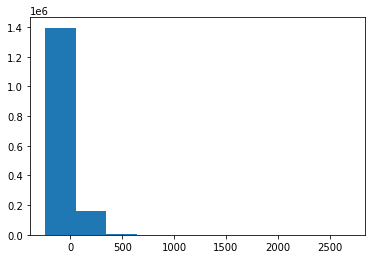

In [19]:
# histogram plot
pyplot.hist(data)
pyplot.show()

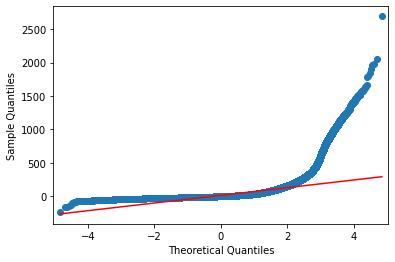

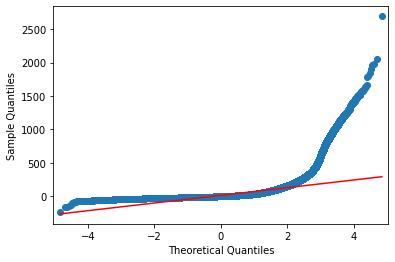

In [21]:
#from statsmodels.graphics.gofplots import qqplot
#from matplotlib import pyplot

# q-q plot
qqplot(data, line='s')
pyplot.show()

In [22]:
import psycopg2 as pg
import pandas.io.sql as psql

connection = pg.connect("host='mid-term-project.ca2jkepgjpne.us-east-2.rds.amazonaws.com' dbname=mid_term_project user=lhl_student password='lhl_student'")
populn_arr_delay = pd.read_sql_query('select arr_delay from flights',con=connection)

populn_arr_delay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15927485 entries, 0 to 15927484
Data columns (total 1 columns):
 #   Column     Dtype  
---  ------     -----  
 0   arr_delay  float64
dtypes: float64(1)
memory usage: 121.5 MB


In [23]:
# D’Agostino’s K^2 Test - on population target variable
# normality test
data2 = populn_arr_delay['arr_delay'].values
stat, p = normaltest(data2)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=nan, p=nan
Sample does not look Gaussian (reject H0)


(array([1.0000000e+00, 1.0000000e+00, 5.3588930e+06, 1.0230152e+07,
        1.9415000e+04, 6.5060000e+03, 7.1100000e+02, 5.0000000e+01,
        5.0000000e+00, 7.0000000e+00]),
 array([-1290. ,  -863.7,  -437.4,   -11.1,   415.2,   841.5,  1267.8,
         1694.1,  2120.4,  2546.7,  2973. ]),
 <BarContainer object of 10 artists>)

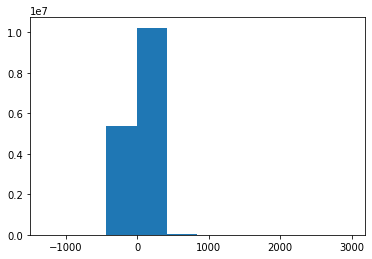

In [24]:
# histogram plot
pyplot.hist(data2)
pyplot.show()

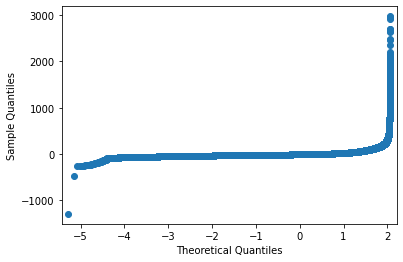

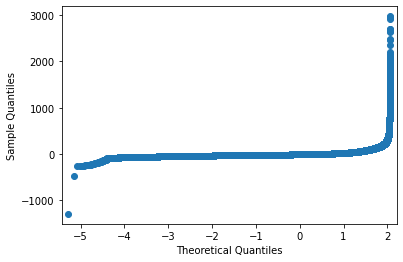

In [26]:
# q-q plot
qqplot(data2, line='s')
pyplot.show()

array([4.59511985, 0.69314718, 0.        , ..., 0.        , 0.        ,
       0.        ])

(array([9.53270e+04, 6.21400e+04, 1.40613e+05, 1.68185e+05, 1.48751e+05,
        1.06736e+05, 5.00670e+04, 9.69900e+03, 2.23900e+03, 1.51000e+02]),
 array([0.        , 0.78991535, 1.5798307 , 2.36974605, 3.15966139,
        3.94957674, 4.73949209, 5.52940744, 6.31932279, 7.10923814,
        7.89915348]),
 <BarContainer object of 10 artists>)

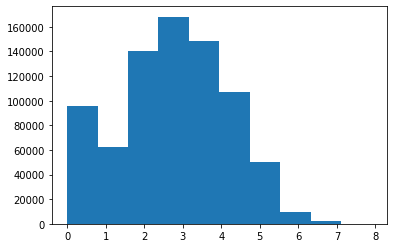

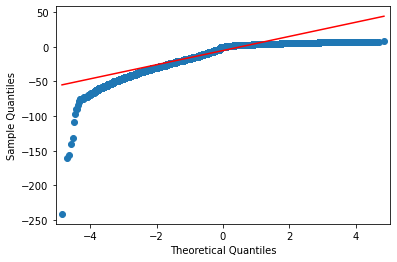

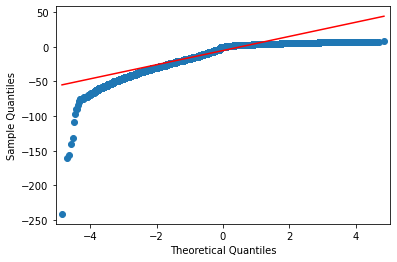

In [29]:
# Test the sample data distritbuion after applying log
# from numpy import *
data_log = ma.log(data)
data_log.filled(0)

# histogram plot
pyplot.hist(data_log)
pyplot.show()

# q-q plot
qqplot(data_log, line='s')
pyplot.show()

#### **Task 2**: Is average/median monthly delay different during the year? If yes, which are months with the biggest delays and what could be the reason?

In [36]:
# compute month & year from 'fl_date' in train_df
month_train = [x.month for x in train_df['fl_date']]
year_train = [x.year for x in train_df['fl_date']]

month_train[:10]
year_train[:10]

# insert month and year columns in train_df
train_df.insert(loc=1, column='month', value=month_train)
train_df.insert(loc=2, column='year', value=year_train)

train_df.info()

[5, 5, 5, 5, 5, 5, 5, 5, 5, 5]

[2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1562048 entries, 0 to 1562047
Data columns (total 24 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   fl_date             1562048 non-null  datetime64[ns]
 1   month               1562048 non-null  int64         
 2   year                1562048 non-null  int64         
 3   mkt_unique_carrier  1562048 non-null  object        
 4   branded_code_share  1562048 non-null  object        
 5   mkt_carrier         1562048 non-null  object        
 6   mkt_carrier_fl_num  1562048 non-null  int64         
 7   op_unique_carrier   1562048 non-null  object        
 8   tail_num            1562048 non-null  object        
 9   op_carrier_fl_num   1562048 non-null  int64         
 10  origin_airport_id   1562048 non-null  int64         
 11  origin              1562048 non-null  object        
 12  origin_city_name    1562048 non-null  object        
 13  dest_airport

In [38]:
year_month_table = pd.pivot_table(train_df, values='arr_delay', index=['year', 'month'],
                        aggfunc=np.mean)

year_month_table = year_month_table.reset_index()
year_month_table

,year,month,arr_delay
0,2018,1,9.638636
1,2018,2,10.670391
2,2018,3,7.512019
3,2018,4,9.558115
4,2018,5,12.395291
5,2018,6,15.717115
6,2018,7,15.815744
7,2018,8,17.646719
8,2018,9,9.329807
9,2018,10,8.729222


,2019,2018
month,,
Jan,12.400839,9.638636
Feb,18.220221,10.670391
Mar,11.058531,7.512019
Apr,12.469077,9.558115
May,15.297826,12.395291
Jun,20.699559,15.717115
Jul,18.151415,15.815744
Aug,16.245921,17.646719
Sep,7.409808,9.329807


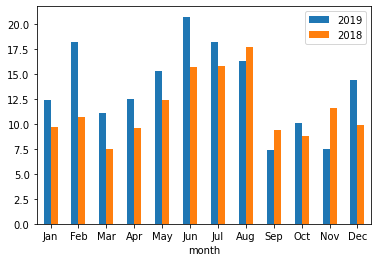

In [51]:
# plot bar graphs
y2019 = year_month_table[year_month_table['year'] == 2019]['arr_delay']
y2019 = y2019.reset_index(drop=True)

y2018 = year_month_table[year_month_table['year'] == 2018]['arr_delay']
month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
year_month_summary = pd.DataFrame({'2019': y2019, '2018': y2018, 
                                  'month': month})
year_month_summary = year_month_summary.set_index('month')
year_month_summary

ax = year_month_summary.plot.bar(rot=0)

#### **Task 3**: Does the weather affect the delay? 
Use the API to pull the weather information for flights. There is no need to get weather for ALL flights. We can choose the right representative sample. Let's focus on four weather types:
- sunny
- cloudy
- rainy
- snow.
Test the hypothesis that these 4 delays are from the same distribution. If they are not, which ones are significantly different?

#### **Task 4**: How taxi times changing during the day? Does higher traffic lead to bigger taxi times?

In [52]:
add_train = pd.read_csv('combined_reduced_flights.csv')
add_train.info()
add_train.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1562048 entries, 0 to 1562047
Data columns (total 43 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   fl_date              1562048 non-null  object 
 1   mkt_unique_carrier   1562048 non-null  object 
 2   branded_code_share   1562048 non-null  object 
 3   mkt_carrier          1562048 non-null  object 
 4   mkt_carrier_fl_num   1562048 non-null  int64  
 5   op_unique_carrier    1562048 non-null  object 
 6   tail_num             1562048 non-null  object 
 7   op_carrier_fl_num    1562048 non-null  int64  
 8   origin_airport_id    1562048 non-null  int64  
 9   origin               1562048 non-null  object 
 10  origin_city_name     1562048 non-null  object 
 11  dest_airport_id      1562048 non-null  int64  
 12  dest                 1562048 non-null  object 
 13  dest_city_name       1562048 non-null  object 
 14  crs_dep_time         1562048 non-null  int64  
 15

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name,target_class
0,2019-05-01,AA,AA_CODESHARE,AA,4593,YX,N436YX,4593,13851,OKC,...,1.0,0.0,0.0,0.0,98.0,NaN,NaN,NaN,NaN,1
1,2019-05-01,AA,AA_CODESHARE,AA,4646,YX,N102HQ,4646,13244,MEM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,2019-05-01,AA,AA_CODESHARE,AA,4646,YX,N102HQ,4646,14100,PHL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [53]:
taxi_out = add_train['taxi_out'].values
taxi_in = add_train['taxi_in'].values

In [54]:
# insert month and year columns in train_df
train_df.insert(loc=22, column='add:taxi_out', value=taxi_out)
train_df.insert(loc=23, column='add_taxi_in', value=taxi_in)

train_df.info()
train_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1562048 entries, 0 to 1562047
Data columns (total 26 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   fl_date             1562048 non-null  datetime64[ns]
 1   month               1562048 non-null  int64         
 2   year                1562048 non-null  int64         
 3   mkt_unique_carrier  1562048 non-null  object        
 4   branded_code_share  1562048 non-null  object        
 5   mkt_carrier         1562048 non-null  object        
 6   mkt_carrier_fl_num  1562048 non-null  int64         
 7   op_unique_carrier   1562048 non-null  object        
 8   tail_num            1562048 non-null  object        
 9   op_carrier_fl_num   1562048 non-null  int64         
 10  origin_airport_id   1562048 non-null  int64         
 11  origin              1562048 non-null  object        
 12  origin_city_name    1562048 non-null  object        
 13  dest_airport

,fl_date,month,year,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,...,crs_dep_time,crs_arr_time,dup,crs_elapsed_time,flights,distance,add:taxi_out,add_taxi_in,arr_delay,target_class
0,2019-05-01,5,2019,AA,AA_CODESHARE,AA,4593,YX,N436YX,4593,...,655,1044,N,169.0,1.0,1158.0,13.0,6.0,99.0,1
1,2019-05-01,5,2019,AA,AA_CODESHARE,AA,4646,YX,N102HQ,4646,...,1108,1434,N,146.0,1.0,875.0,17.0,6.0,2.0,1
2,2019-05-01,5,2019,AA,AA_CODESHARE,AA,4646,YX,N102HQ,4646,...,840,1037,N,177.0,1.0,875.0,36.0,7.0,1.0,1
3,2019-05-01,5,2019,AA,AA_CODESHARE,AA,4648,YX,N110HQ,4648,...,1441,1705,N,144.0,1.0,736.0,13.0,17.0,4.0,1
4,2019-05-01,5,2019,AA,AA_CODESHARE,AA,4656,YX,N114HQ,4656,...,1253,1401,N,68.0,1.0,88.0,9.0,15.0,15.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562043,2018-11-30,11,2018,UA,UA_CODESHARE,UA,6140,YV,N85320,6140,...,1433,1558,N,85.0,1.0,374.0,16.0,4.0,-12.0,0
1562044,2018-11-30,11,2018,UA,UA_CODESHARE,UA,6005,YV,N87345,6005,...,1720,1853,N,93.0,1.0,384.0,15.0,3.0,-14.0,0
1562045,2018-11-30,11,2018,UA,UA_CODESHARE,UA,6131,YV,N503MJ,6131,...,2200,2343,N,103.0,1.0,441.0,8.0,8.0,-21.0,0
1562046,2018-11-30,11,2018,UA,UA_CODESHARE,UA,6045,YV,N511MJ,6045,...,1030,1127,N,57.0,1.0,157.0,16.0,5.0,-4.0,0


#### **Task 5**: What is the average percentage of delays that is already created before departure? (aka are arrival delays caused by departure delays?) Are airlines able to lower the delay during the flights?

#### **Task 6**: How many states cover 50% of US air traffic? 

#### **Task 7**: Test the hypothesis whether planes fly faster when there is the departure delay? 

#### **Task 8**: When (which hour) do most 'LONG', 'SHORT', 'MEDIUM' haul flights take off?

#### **Task 9**: Find the top 10 the bussiest airports. Does the biggest number of flights mean that the biggest number of passengers went through the particular airport? How much traffic do these 10 airports cover?

#### **Task 10**: Do bigger delays lead to bigger fuel comsumption per passenger? 
We need to do four things to answer this as accurate as possible:
- Find out average monthly delay per air carrier (monthly delay is sum of all delays in 1 month)
- Find out distance covered monthly by different air carriers
- Find out number of passengers that were carried by different air carriers
- Find out total fuel comsumption per air carrier.

Use this information to get the average fuel comsumption per passenger per km. Is this higher for the airlines with bigger average delays?